Clase        Límite inferior Límite superior Marca de clase  Frec. Absoluta  Frec. Relativa  Frec. Acumulada (%)
----------------------------------------------------------------------------------------------------------------
Clase 1      3.0             4.0             3.5             1               0.1111          12.5           
Clase 2      4.0             5.0             4.5             2               0.2222          37.5           
Clase 3      5.0             6.0             5.5             4               0.4444          87.5           
Clase 4      6.0             7.0             6.5             1               0.1111          100.0          
Clase 5      7.0             8               7.5             0               0.0             100.0          
----------------------------------------------------------------------------------------------------------------


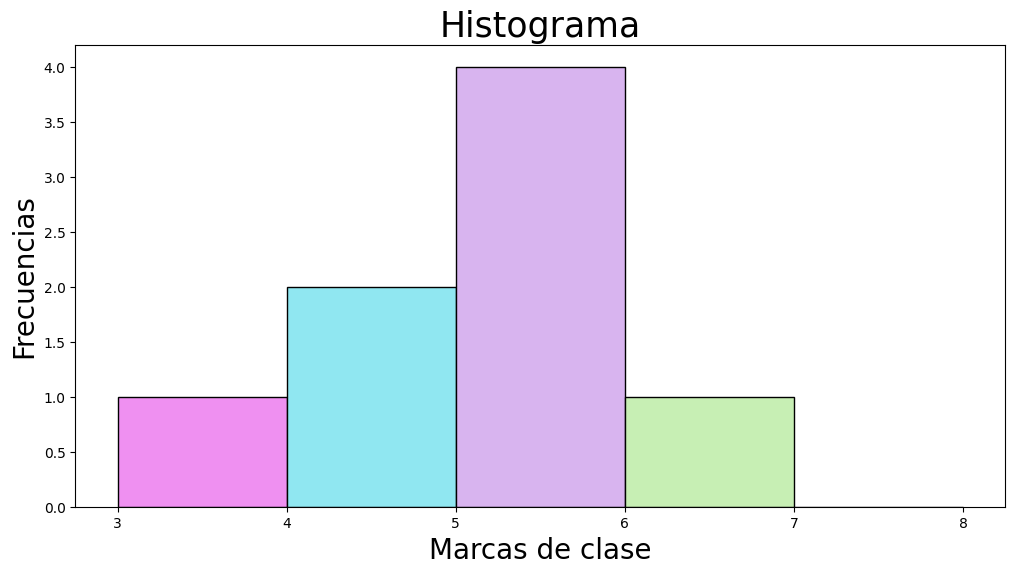

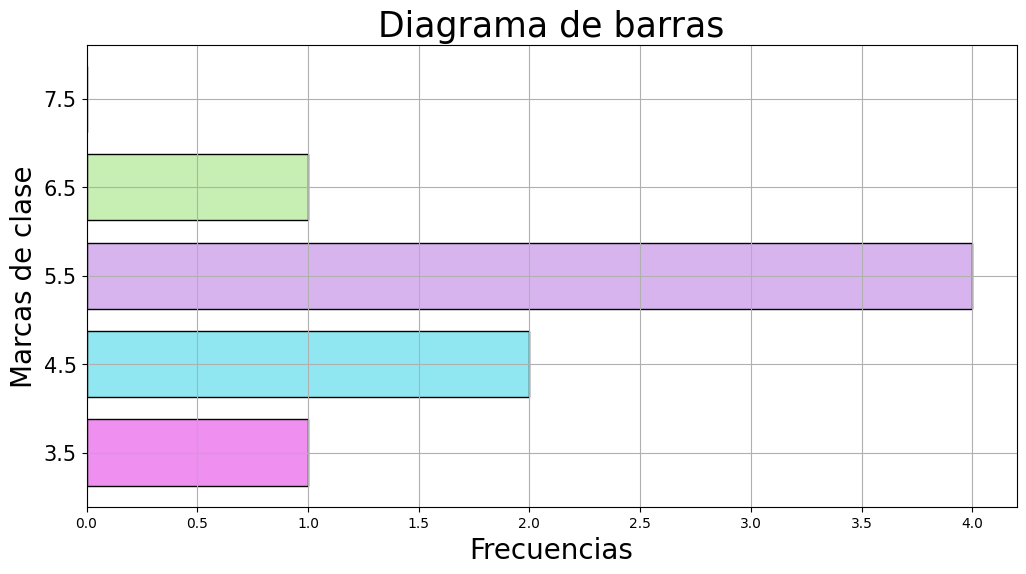

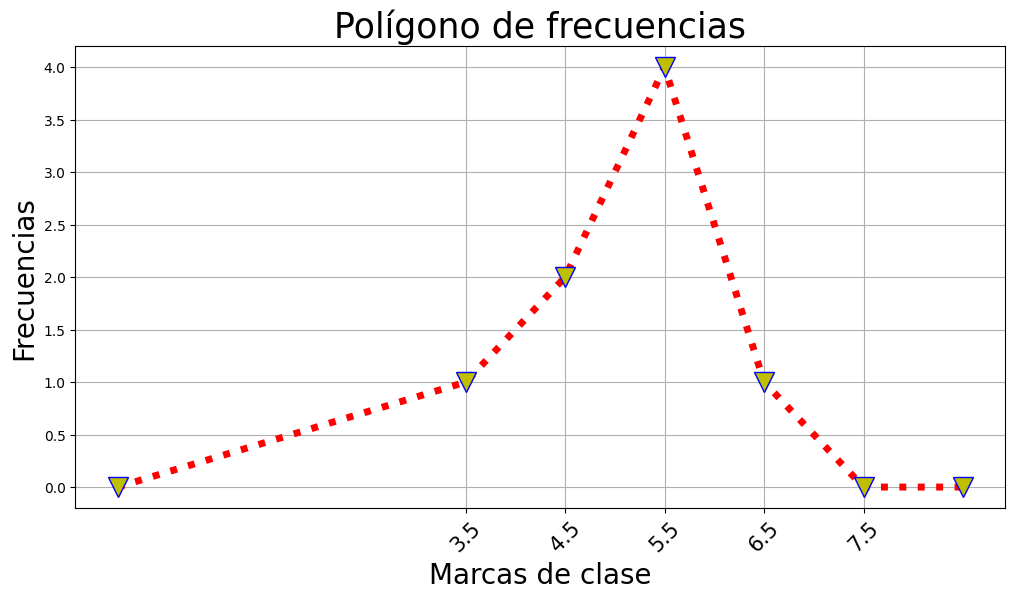

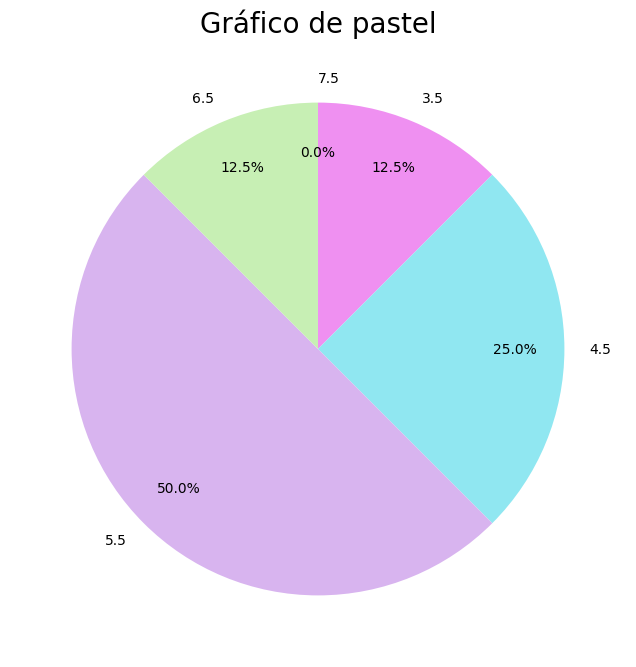

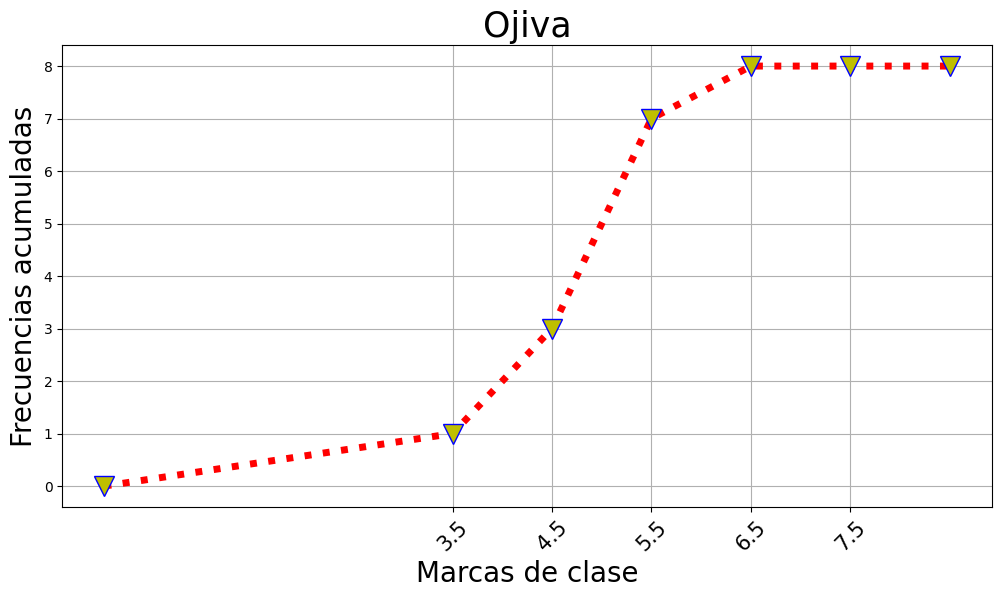

In [1]:
import math
import matplotlib.pyplot as plt

def ordenar_datos(datos):
    return sorted(datos)

def calcular_rango(datos):
    valor_min = min(datos, key=len)  # Encontrar la cadena más corta como mínimo
    valor_max = max(datos, key=len)  # Encontrar la cadena más larga como máximo
    rango = len(valor_max) - len(valor_min)  # Calcular la diferencia en longitudes
    return rango, valor_min, valor_max

def calcular_numero_clases(n):
    num_clases = 1 + 3.3 * math.log10(n)
    return math.ceil(num_clases)

def calcular_ancho_clase(rango, num_clases):
    ancho_clase = rango / num_clases
    return ancho_clase

def calcular_limites_clase(valor_min, ancho_clase, num_clases):
    # Convertir las cadenas en rangos numéricos basados en la longitud de las cadenas
    limites_inferiores = [len(valor_min) + i * ancho_clase for i in range(num_clases)]
    limites_superiores = [lim_inf + ancho_clase for lim_inf in limites_inferiores]
    return limites_inferiores, limites_superiores

def calcular_marcas_clase(limites_inferiores, limites_superiores):
    marcas_clase = [(inf + sup) / 2 for inf, sup in zip(limites_inferiores, limites_superiores)]
    return marcas_clase

def frecuencia_absoluta(datos, limites_inferiores, limites_superiores):
    frec_absoluta = []
    
    for inf, sup in zip(limites_inferiores, limites_superiores):
        contador = sum(1 for dato in datos if inf <= len(dato) < sup)
        frec_absoluta.append(contador)
    
    return frec_absoluta

def frecuencia_relativa(frecuencias, total_datos):
    frec_relativa = [frec / total_datos for frec in frecuencias]
    return frec_relativa

def frecuencia_acumulada(frecuencias):
    total_datos = sum(frecuencias)
    frec_acumulada = [sum(frecuencias[:i+1]) / total_datos * 100 for i in range(len(frecuencias))]
    return frec_acumulada

def imprimir_tabla(datos_ordenados, limites_inferiores, limites_superiores, marcas_clase, frec_absoluta, frec_relativa, frec_acumulada):
    print("{:<12} {:<15} {:<15} {:<15} {:<15} {:<15} {:<15}".format("Clase", "Límite inferior", "Límite superior", "Marca de clase", "Frec. Absoluta", "Frec. Relativa", "Frec. Acumulada (%)"))
    print("-" * 112)
    
    for i in range(len(limites_inferiores)):
        clase = f"Clase {i+1}"
        lim_inf = round(limites_inferiores[i], 2)
        lim_sup = round(limites_superiores[i], 2)
        marca = round(marcas_clase[i], 2)
        frec_abs = frec_absoluta[i]
        frec_rel = round(frec_relativa[i], 4)
        frec_acum = round(frec_acumulada[i], 2)
        print("{:<12} {:<15} {:<15} {:<15} {:<15} {:<15} {:<15}".format(clase, lim_inf, lim_sup, marca, frec_abs, frec_rel, frec_acum))
    
    print("-" * 112)

def crear_histograma(marcas_clase, frecuencias):
    plt.figure(figsize=(12, 6))
    plt.bar(marcas_clase, frecuencias,
           width=1, edgecolor="k",
           color=["#EF90F1", "#90E7F1", "#D8B4EF", "#C7EFB4", "#EFB4C7", "#EFE4B4"])
    
    plt.xlabel("Marcas de clase", fontsize=20)
    plt.ylabel("Frecuencias", fontsize=20)
    plt.title("Histograma", fontsize=25)
    plt.show()

def crear_diagrama_barras(marcas_clase, frecuencias):
    plt.figure(figsize=(12, 6))
    
    plt.barh(marcas_clase, frecuencias,
             height=0.75, edgecolor="k",
             color=["#EF90F1", "#90E7F1", "#D8B4EF", "#C7EFB4", "#EFB4C7", "#EFE4B4"])
    
    plt.yticks(marcas_clase, fontsize=15)
    plt.xlabel("Frecuencias", fontsize=20)
    plt.ylabel("Marcas de clase", fontsize=20)
    plt.title("Diagrama de barras", fontsize=25)
    plt.grid()
    plt.show()

def crear_poligono_frecuencias(marcas_clase, frecuencias):
    datos_x = [0] + list(marcas_clase) + [marcas_clase[-1] + (marcas_clase[1] - marcas_clase[0])]
    datos_y = [0] + list(frecuencias) + [0]

    plt.figure(figsize=(12, 6))
    plt.plot(datos_x, datos_y, 
             linewidth=5, color="r", linestyle=":", 
             marker="v", markersize=15, markerfacecolor="y", markeredgecolor="b")

    plt.xticks(marcas_clase, fontsize=15, rotation=45)
    plt.xlabel("Marcas de clase", fontsize=20)
    plt.ylabel("Frecuencias", fontsize=20)
    plt.title("Polígono de frecuencias", fontsize=25)
    plt.grid(True)

    plt.show()

def crear_grafico_pastel(frecuencias, marcas_clase):
    plt.figure(figsize=(8, 8))
    plt.pie(frecuencias, 
            counterclock=False, 
            startangle=90, 
            autopct="%0.1f%%", 
            pctdistance=0.8, 
            colors=["#EF90F1", "#90E7F1", "#D8B4EF", "#C7EFB4", "#EFB4C7", "#EFE4B4"], 
            labels=marcas_clase)
    plt.title("Gráfico de pastel", fontsize=20)
    plt.show()

def crear_ojiva(marcas_clase, frecuencias):
    frec_acumulada = [sum(frecuencias[:i+1]) for i in range(len(frecuencias))]
    
    datos_x = [0] + marcas_clase + [marcas_clase[-1] + (marcas_clase[1] - marcas_clase[0])]
    datos_y = [0] + frec_acumulada + [frec_acumulada[-1]]

    plt.figure(figsize=(12, 6))

    plt.plot(datos_x, datos_y, 
             linewidth=5, color="r", linestyle=":", 
             marker="v", markersize=15, markerfacecolor="y", markeredgecolor="b")

    plt.xticks(marcas_clase, fontsize=15, rotation=45)
    plt.xlabel("Marcas de clase", fontsize=20)
    plt.ylabel("Frecuencias acumuladas", fontsize=20)
    plt.title("Ojiva", fontsize=25)
    plt.grid(True)

    plt.show()

# Ejemplo de uso con cadenas de caracteres
datos = ["perro", "gato", "elefante", "ratón", "tigre", "águila", "oveja", "vaca", "oso"]

# Paso 1: Ordenar los datos por longitud de cadena
datos_ordenados = ordenar_datos(datos)

# Paso 2: Calcular el rango (basado en la longitud de las cadenas)
rango, valor_min, valor_max = calcular_rango(datos_ordenados)

# Paso 3: Determinar el número de clases
n = len(datos_ordenados)
num_clases = calcular_numero_clases(n)

# Paso 4: Calcular el ancho de clase
ancho_clase = calcular_ancho_clase(rango, num_clases)

# Paso 5: Calcular límites de clase (convertir longitud de cadenas en rangos numéricos)
limites_inferiores, limites_superiores = calcular_limites_clase(valor_min, ancho_clase, num_clases)
limites_superiores[-1] = len(valor_max)  # Asegurar que el último límite superior sea la longitud máxima

# Paso 6: Calcular marcas de clase (promedio de los límites)
marcas_clase = calcular_marcas_clase(limites_inferiores, limites_superiores)

# Paso 7: Calcular frecuencias absolutas
frec_absoluta = frecuencia_absoluta(datos_ordenados, limites_inferiores, limites_superiores)

# Paso 8: Calcular frecuencias relativas
frec_relativa = frecuencia_relativa(frec_absoluta, n)

# Paso 9: Calcular frecuencias acumuladas
frec_acumulada = frecuencia_acumulada(frec_absoluta)

# Imprimir la tabla
imprimir_tabla(datos_ordenados, limites_inferiores, limites_superiores, marcas_clase, frec_absoluta, frec_relativa, frec_acumulada)

# Crear los gráficos
crear_histograma(marcas_clase, frec_absoluta)
crear_diagrama_barras(marcas_clase, frec_absoluta)
crear_poligono_frecuencias(marcas_clase, frec_absoluta)
crear_grafico_pastel(frec_absoluta, marcas_clase)
crear_ojiva(marcas_clase, frec_absoluta)
